In [1]:
import torch

# Check if a GPU is available
if torch.cuda.is_available():
  # Get the name of the GPU
  gpu_name = torch.cuda.get_device_name(0)

  # Print the GPU name
  print(gpu_name)
else:
  print("No GPU available")

NVIDIA GeForce RTX 4070 Laptop GPU


In [2]:
## 1. Make classification data and get it ready
import sklearn

In [3]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

#create circles
X,y = make_circles(n_samples,
                  noise=0.03,
                 random_state=42 )

In [4]:
len(X),len(y)

(1000, 1000)

In [5]:
print(f'First 5 samples of X:\n {X[:5]}')
print(f'First 5 samples of y:\n {y[:5]}')

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [6]:
# make data frame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


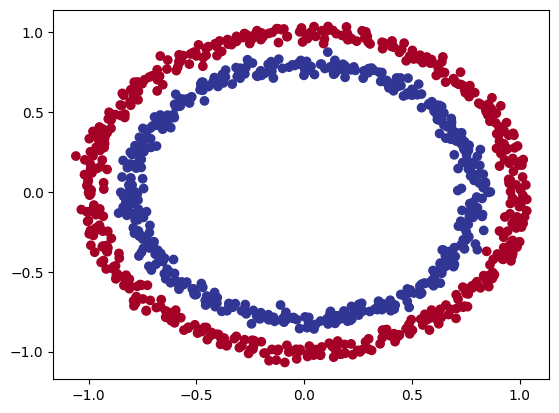

In [7]:
# visualize,visualize,visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu);

In [8]:
#check input and output shape
X.shape,y.shape

((1000, 2), (1000,))

In [9]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [10]:
# view the first exammple of feature and label
X_sample = X[0]
y_sample = y[0]

print(f'Values for one sammple of X:{X_sample} and the same for y: {y_sample}')
print(f'Shapes for one sammple of X:{X_sample.shape} and the same for y: {y_sample.shape}')

Values for one sammple of X:[0.75424625 0.23148074] and the same for y: 1
Shapes for one sammple of X:(2,) and the same for y: ()


### Turn data into tensors

In [11]:
import torch
torch.__version__

'2.3.0.dev20240218+cu121'

In [12]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [14]:
#split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [16]:
n_samples

1000

### Building a model
1. setup device agonistic code
2. Construct a model (by subclassing nn.Module)
3. Define a loss function and optimizer
4. Create a training and test loop

In [17]:
# import torch
import torch
import torch.nn as nn

#device setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [18]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [19]:
# consturct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #2. nn.linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2,out_features=5) #takes 2 feature as input and upscale to 5
        self.layer_2 = nn.Linear(in_features=5,out_features=1) # take 5 feature as input from last layer and outputs a single feature 

    #3. Define a forward() method that outlines the forward pass
    def forward(self,x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2

# 4. Instantiate an instance of our model class and send it to the target device 
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
device

'cuda'

In [21]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [22]:
# lets replicate the model above using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5796,  0.1496],
                      [ 0.1467,  0.1243],
                      [ 0.2799,  0.5698],
                      [-0.4377,  0.0532],
                      [-0.2568, -0.0009]], device='cuda:0')),
             ('0.bias',
              tensor([-0.1158,  0.2128, -0.1608,  0.3890, -0.6774], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.2827,  0.3581, -0.3750,  0.1249,  0.4123]], device='cuda:0')),
             ('1.bias', tensor([0.0123], device='cuda:0'))])

In [24]:
# Make predicition
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f'Length of predictions : {len(untrained_preds)} , Shape:{untrained_preds.shape}')
print(f'Length of test samples : {len(X_test)} , Shape:{X_test.shape}')
print(f'\nFirst 10 predictions:\n{untrained_preds[:10]}')
print(f'\nFirst 10 labels:\n{y_test[:10]}')

Length of predictions : 200 , Shape:torch.Size([200, 1])
Length of test samples : 200 , Shape:torch.Size([200, 2])

First 10 predictions:
tensor([[-0.0556],
        [-0.2362],
        [ 0.1882],
        [-0.1237],
        [-0.1765],
        [-0.2840],
        [-0.5035],
        [-0.5156],
        [ 0.2032],
        [-0.2523]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [25]:
X_test[:10],y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [26]:
## setup loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [27]:
# calculate accuracy 
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

### Train the model
1. forward pass
2. calculate the loss
3. optimizer zero grad
4. Loss backward (backpropagation)
5. optimizer step (gradient descent)

In [28]:
### going from raw logits to predicition probabilities to prediction labels

In [29]:
# view the first 5 output of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0556],
        [-0.2362],
        [ 0.1882],
        [-0.1237],
        [-0.1765]], device='cuda:0')

In [30]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [31]:
# sigmoid activation funcition on our model logits to turn into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4861],
        [0.4412],
        [0.5469],
        [0.4691],
        [0.4560]], device='cuda:0')

In [32]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits to pred probs to pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

#get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 0.], device='cuda:0')

In [33]:
device

'cuda'

In [34]:
torch.manual_seed(42)
# torch.cuda.manual_seed(42)


# set the number of epochs
epochs = 1000

# put data to target device 
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)


# building the training and evaluation
for epoch in range(epochs):
    model_0.train()

    # forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits into predprobs into predlabels

    
    # calculate the loss
    # loss = loss_fn(torch.sigmoid(y_logits),y_train) # nn.BCELoss expects predicition probabality as input
    loss = loss_fn(y_logits,y_train) # nn.BCEWithLogitsLoss expects raw logits as input
    acc = accuracy_fn(y_true=y_train,y_pred=y_pred)

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward (backpropagation)
    loss.backward()

    # optimizer step (gradient descent)
    optimizer.step()


    ### testing 
    model_0.eval()
    with torch.inference_mode():
        # forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # calculate test loss/acc
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)

    # print out what's happenin
    if epoch % 100 == 0:
        print(f"Epoch:{epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}% ")

Epoch:0 | Loss: 0.70412, Acc: 47.75% | Test loss: 0.69666, Test Acc: 52.50% 
Epoch:100 | Loss: 0.70104, Acc: 48.62% | Test loss: 0.69438, Test Acc: 52.00% 
Epoch:200 | Loss: 0.69917, Acc: 48.38% | Test loss: 0.69324, Test Acc: 52.00% 
Epoch:300 | Loss: 0.69787, Acc: 48.50% | Test loss: 0.69262, Test Acc: 51.50% 
Epoch:400 | Loss: 0.69691, Acc: 49.00% | Test loss: 0.69228, Test Acc: 51.50% 
Epoch:500 | Loss: 0.69617, Acc: 48.88% | Test loss: 0.69209, Test Acc: 51.50% 
Epoch:600 | Loss: 0.69558, Acc: 49.00% | Test loss: 0.69200, Test Acc: 51.00% 
Epoch:700 | Loss: 0.69511, Acc: 49.00% | Test loss: 0.69199, Test Acc: 51.50% 
Epoch:800 | Loss: 0.69473, Acc: 49.12% | Test loss: 0.69202, Test Acc: 51.00% 
Epoch:900 | Loss: 0.69443, Acc: 49.25% | Test loss: 0.69208, Test Acc: 51.00% 


### Make predictions and evaluate the model
importing a function called plot_decision_boundary()


In [35]:
import requests
from pathlib import Path

# Download helper function from Learn pytorch repo
if Path('helper_functions.py').is_file():
    print('helper_function.py already exists, skipping download')
else:
    print('Downloading helper_function.py')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_function.py','wb') as f:
        f.write(request.content)

from helper_function import plot_predictions,plot_decision_boundary

In [36]:
import matplotlib.pyplot as plt

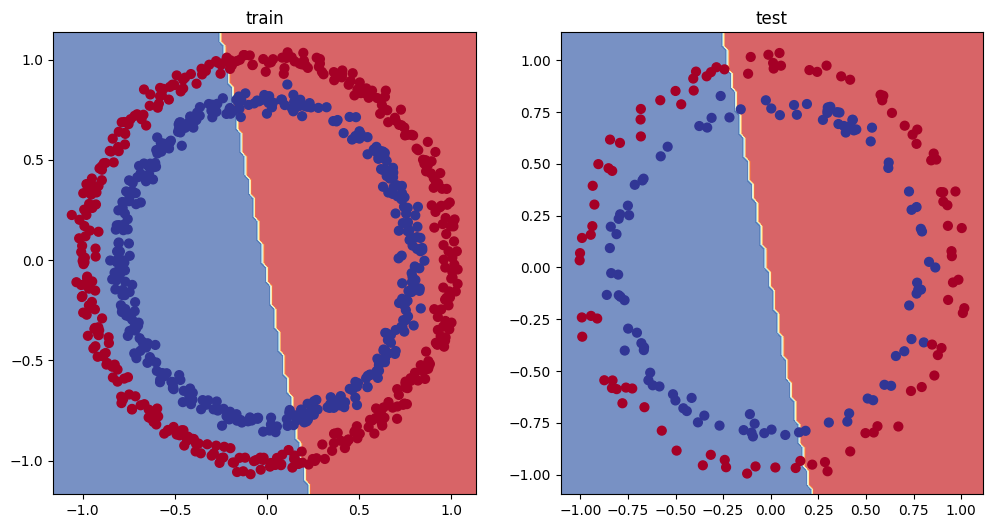

In [37]:
# plot decision boundary of the model 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_0,X_test,y_test)

In [38]:
## Improving a model
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5265,  0.1741],
                      [ 0.2422,  0.1693],
                      [ 0.2024,  0.5338],
                      [-0.4157,  0.0633],
                      [-0.1698,  0.0397]])),
             ('0.bias', tensor([-0.1029,  0.2323, -0.1788,  0.3946, -0.6578])),
             ('1.weight',
              tensor([[ 0.1625,  0.4327, -0.2637,  0.0492,  0.3289]])),
             ('1.bias', tensor([0.0641]))])

In [39]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10,out_features=1)

    def forward(self,x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1     

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [40]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [41]:
# create a loss function
loss_fn = nn.BCEWithLogitsLoss()

#create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [42]:
# write a train and test loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# Train for longer
epochs = 1000

# put data to target device 
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)


#train and test loop
for epoch in range(epochs):
    model_1.train()
    #forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    #loss
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train,y_pred=y_pred)
    #optimizer zero grad
    optimizer.zero_grad()
    #loss Backward (Backpropagation)
    loss.backward()
    #optimizer step
    optimizer.step()


    #testing
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # loss 
        loss = loss_fn(test_logits,y_test)
        acc = accuracy_fn(y_true = y_test,y_pred=test_pred)
    if epoch % 100 == 0:
        print(f"Epoch:{epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}% ")


Epoch:0 | Loss: 0.69261, Acc: 51.00% | Test loss: 0.69216, Test Acc: 51.00% 
Epoch:100 | Loss: 0.69379, Acc: 48.00% | Test loss: 0.69216, Test Acc: 51.00% 
Epoch:200 | Loss: 0.69437, Acc: 46.00% | Test loss: 0.69216, Test Acc: 51.00% 
Epoch:300 | Loss: 0.69458, Acc: 45.00% | Test loss: 0.69216, Test Acc: 51.00% 
Epoch:400 | Loss: 0.69465, Acc: 46.00% | Test loss: 0.69216, Test Acc: 51.00% 
Epoch:500 | Loss: 0.69467, Acc: 46.00% | Test loss: 0.69216, Test Acc: 51.00% 
Epoch:600 | Loss: 0.69468, Acc: 46.00% | Test loss: 0.69216, Test Acc: 51.00% 
Epoch:700 | Loss: 0.69468, Acc: 46.00% | Test loss: 0.69216, Test Acc: 51.00% 
Epoch:800 | Loss: 0.69468, Acc: 46.00% | Test loss: 0.69216, Test Acc: 51.00% 
Epoch:900 | Loss: 0.69468, Acc: 46.00% | Test loss: 0.69216, Test Acc: 51.00% 


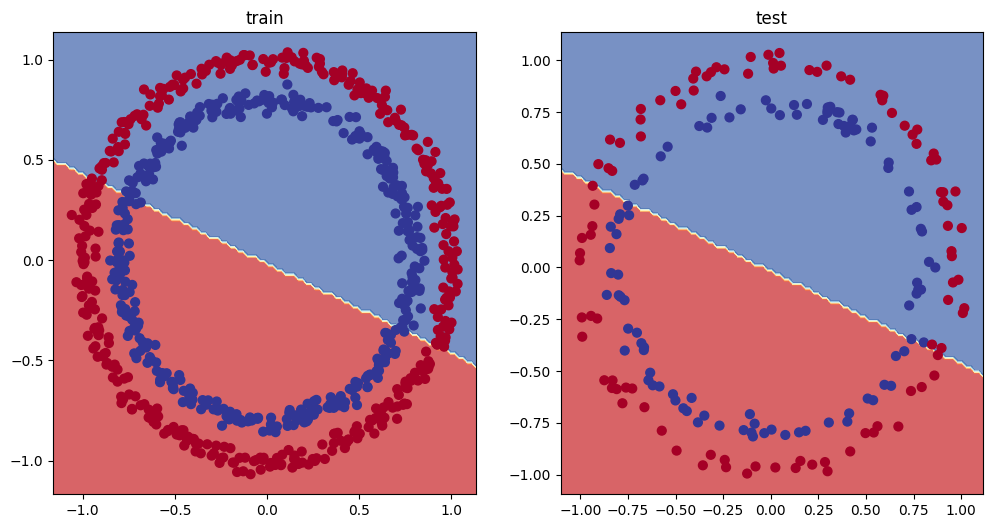

In [43]:
# plot decision boundary of the model 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_1,X_test,y_test)

### Preparing data to see if our model can fit a straight line

In [44]:
# create some data (same as notebook 01)
weight = 0.7
bias  = 0.3
start = 0
end = 1
step = 0.01

#create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# check our the data
print(len(X_regression))
X_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [45]:
## create train and test split
train_split = int(0.8*len(X_regression))
X_train_regression,y_train_regression  = X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression = X_regression[train_split:],y_regression[train_split:]


#check the length
len(X_train_regression),len(y_train_regression),len(X_test_regression),len(y_test_regression)

(80, 80, 20, 20)

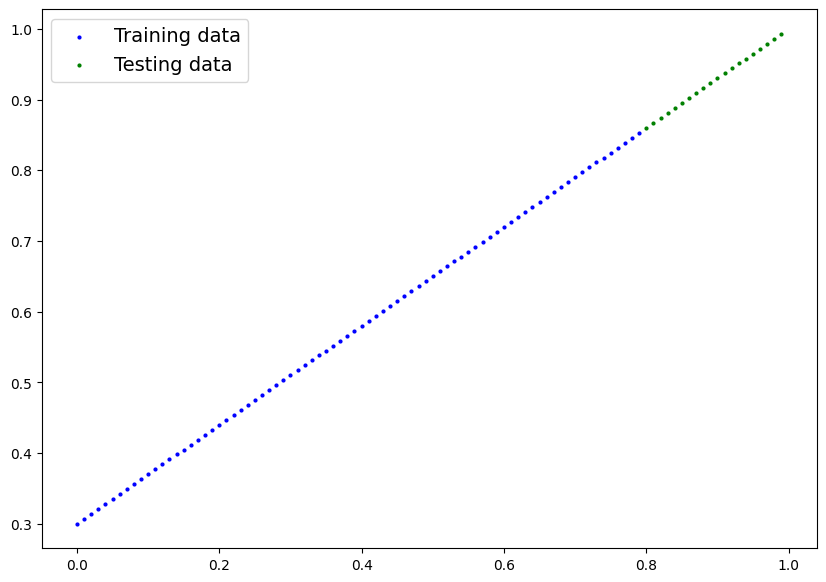

In [46]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                test_data=X_test_regression,
                test_labels=y_test_regression)

In [47]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [48]:
# same architechture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [49]:
# loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.01)

In [50]:
# train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs=1000


# puttings data to the target device
X_train_regression,y_train_regression = X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression = X_test_regression.to(device),y_test_regression.to(device)


for epoch in range(epochs):
    model_2.train()
    #forward pass
    y_pred_regression = model_2(X_train_regression)
    # Calculate the loss
    loss = loss_fn(y_pred_regression,X_train_regression)
    #optimizer zero grad
    optimizer.zero_grad()
    # Loss backward (backpropagation)
    loss.backward()
    # optimizer step (gradient descent)
    optimizer.step()

    ## testing and evaluation
    model_2.eval()
    with torch.inference_mode():
        test_regression_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_regression_pred,y_test_regression)
    if epoch % 100 == 0:
        print(f'Epoch:{epoch} | Loss: {loss:.5f} | Test_loss: {test_loss:.5f}')

Epoch:0 | Loss: 0.57836 | Test_loss: 0.91103
Epoch:100 | Loss: 0.01111 | Test_loss: 0.01493
Epoch:200 | Loss: 0.01775 | Test_loss: 0.02307
Epoch:300 | Loss: 0.02306 | Test_loss: 0.03610
Epoch:400 | Loss: 0.02260 | Test_loss: 0.03590
Epoch:500 | Loss: 0.02232 | Test_loss: 0.03586
Epoch:600 | Loss: 0.02165 | Test_loss: 0.03593
Epoch:700 | Loss: 0.02017 | Test_loss: 0.03613
Epoch:800 | Loss: 0.02091 | Test_loss: 0.03504
Epoch:900 | Loss: 0.01903 | Test_loss: 0.03417


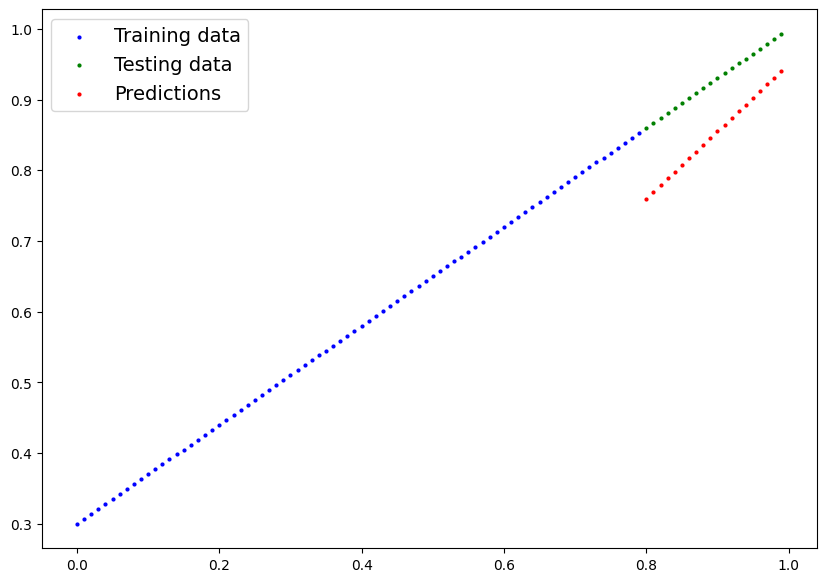

In [51]:
# turn on evaluation mode
model_2.eval()

# Make prediction (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot the data and predictions
plot_predictions(train_data=X_train_regression.cpu().detach().numpy(),
                 train_labels=y_train_regression.cpu().detach().numpy(),
                 test_data=X_test_regression.cpu().detach().numpy(),
                 test_labels=y_test_regression.cpu().detach().numpy(),
                predictions=y_preds.cpu().detach().numpy())

### The missing piece : non- linearity

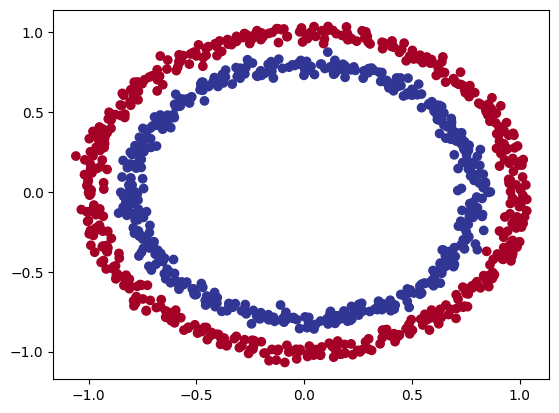

In [52]:
## Recreate Non - linear data
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,noise=0.03,random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [53]:
# convert data to tensors and then to train and test split
import torch
from sklearn.model_selection import train_test_split

#turn data to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# traing and splitting
# train_split = int(0.8*len(X))
# X_train,y_train = X[:train_split],y[:train_split]
# X_test,y_test = X[test_split:],y[test_split:]
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                test_size=0.2,
                                                random_state=42)



# checking the length of the splits
len(X_train),len(y_train),len(X_test),len(y_test)

X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [54]:
## building a model with non-linearity
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10,out_features=1)
        self.relu = nn.ReLU()

    def forward(self,X):
        #where should we put our non-linear activation functions?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(X)))))  
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [55]:
# setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),lr=0.03)


In [56]:
device

'cuda'

In [57]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

# Loop though data
epochs = 10000

for epoch in range(epochs):
    #### Training
    model_3.train()
    
    # forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits to pred prob to predition label

    # calculate the loss
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train,
                     y_pred=y_pred)

    # optimizer zero grad
    optimizer.zero_grad()

    #loss backward (BackPropagation)
    loss.backward()

    #optimizer step (Gradient Descent)
    optimizer.step()


    model_3.eval()
    #### Test and evaluation
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)

    if epoch % 1000 == 0:
        print(f"Epoch:{epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}% ")   

Epoch:0 | Loss: 0.69295, Acc: 50.00% | Test loss: 0.69323, Test Acc: 50.00% 
Epoch:1000 | Loss: 0.68795, Acc: 53.00% | Test loss: 0.68724, Test Acc: 56.00% 
Epoch:2000 | Loss: 0.67511, Acc: 54.50% | Test loss: 0.67287, Test Acc: 56.00% 
Epoch:3000 | Loss: 0.62327, Acc: 74.00% | Test loss: 0.62139, Test Acc: 79.00% 
Epoch:4000 | Loss: 0.36919, Acc: 97.88% | Test loss: 0.40548, Test Acc: 92.50% 
Epoch:5000 | Loss: 0.12148, Acc: 99.75% | Test loss: 0.16497, Test Acc: 99.00% 
Epoch:6000 | Loss: 0.05765, Acc: 99.88% | Test loss: 0.08671, Test Acc: 99.50% 
Epoch:7000 | Loss: 0.03625, Acc: 99.88% | Test loss: 0.05977, Test Acc: 100.00% 
Epoch:8000 | Loss: 0.02603, Acc: 99.88% | Test loss: 0.04663, Test Acc: 100.00% 
Epoch:9000 | Loss: 0.02035, Acc: 99.88% | Test loss: 0.03863, Test Acc: 100.00% 


In [58]:
# make predicition
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

In [59]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.9072,  1.5699],
                      [-0.6204,  2.2334],
                      [-0.1549,  0.1427],
                      [-2.5946, -0.2805],
                      [ 0.7474, -2.5922],
                      [ 1.4002, -0.0606],
                      [ 1.9087,  0.2857],
                      [ 0.3410, -0.0998],
                      [ 0.8006,  0.7287],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.2094, -1.0440, -0.2872, -0.5594, -0.6488, -0.6702, -0.7976, -0.4252,
                      -0.2557, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0266, -0.8041,  0.2441, -0.3905, -0.4444, -0.0969, -0.2990,  0.2555,
                       -0.1049, -0.0997],
                      [ 1.6128,  2.2063,  0.1331,  2.4123,  2.3481,  1.2216,  1.8144,  0.0566,
                        0.9541, -0.1927],
                      [-0.3130, -0.124

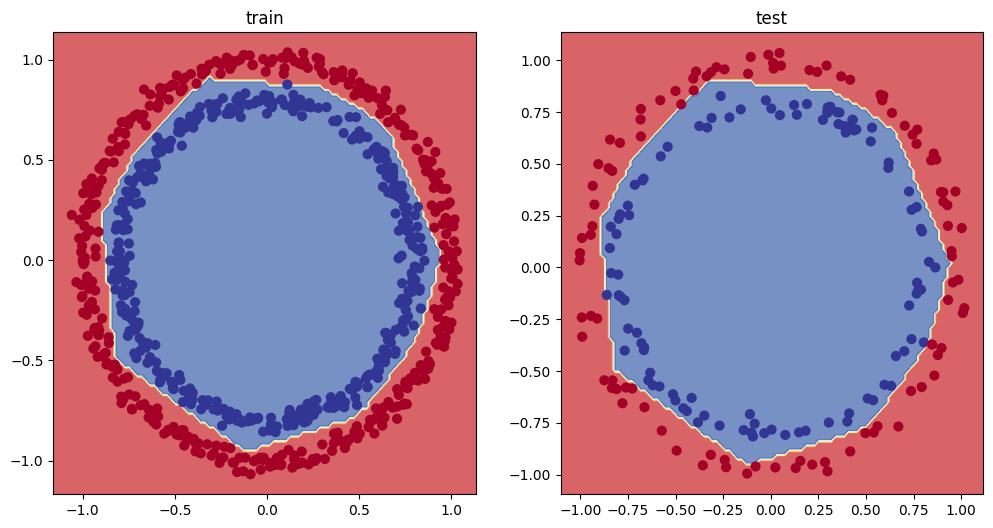

In [60]:
# plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_3,X_test,y_test)

### Replicating non-linear activation function

In [61]:
# create a tensor
A = torch.arange(-10,10,1,dtype=torch.float32)
A.dtype

torch.float32

In [62]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

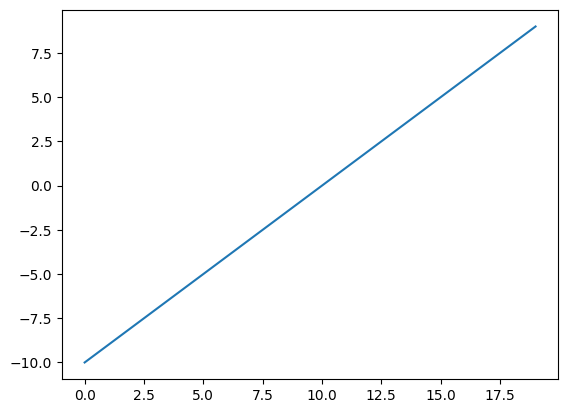

In [63]:
plt.plot(A)

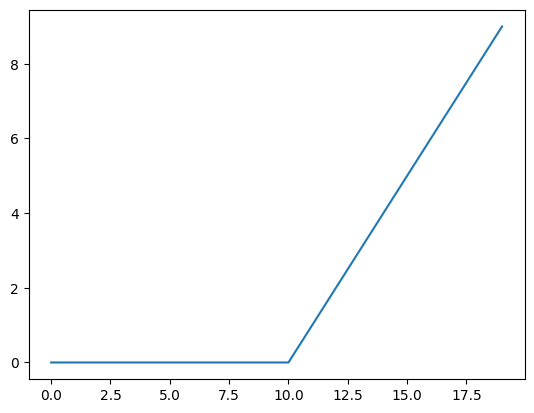

In [64]:
plt.plot(torch.relu(A))

In [65]:
def relu(x:torch.Tensor)->torch.Tensor:
    return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

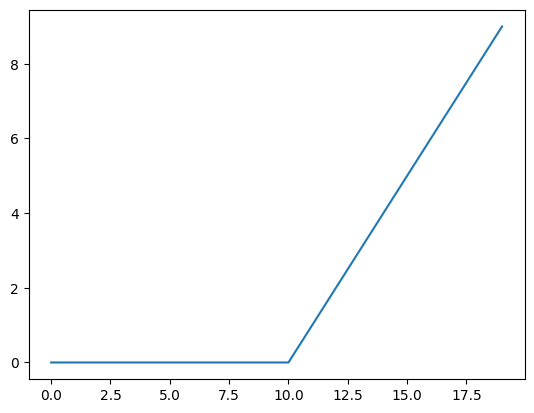

In [66]:
# plot relu activation function
plt.plot(relu(A))

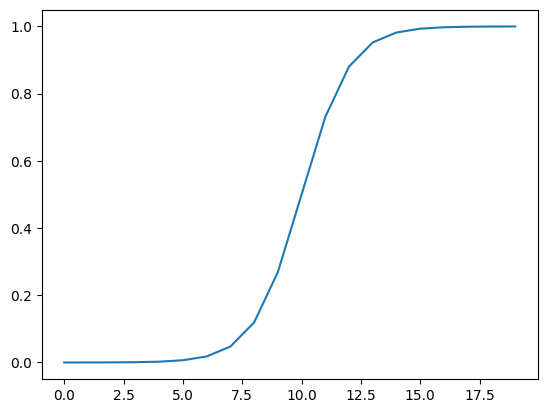

In [67]:
# now lets do same for sigmoid
def sigmoid(x):
    return 1/(1+torch.exp(-x))

plt.plot(sigmoid(A))

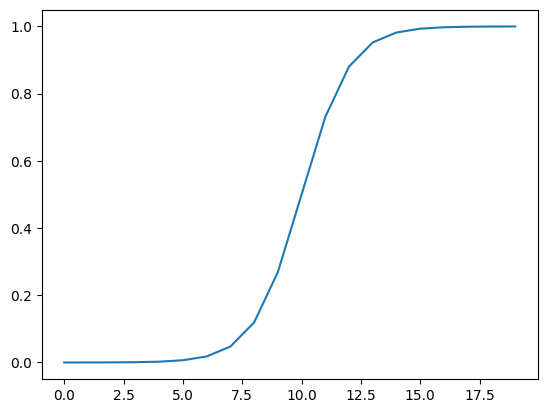

In [68]:
plt.plot(sigmoid(A));

### Putting it all together with a multi-class classification

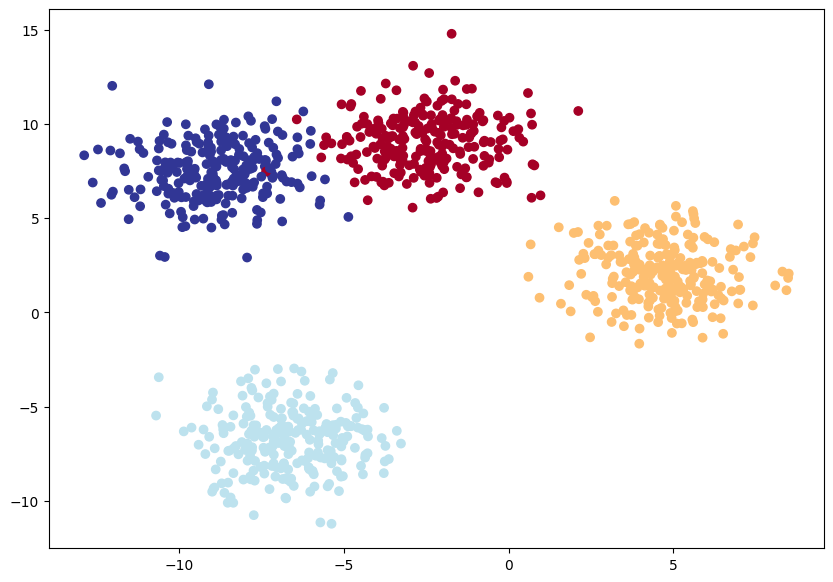

In [100]:
# import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# create multi-class data
X_blob,y_blob = make_blobs(n_samples=1000,
                          n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,
                           cluster_std = 1.5,
                           random_state = RANDOM_SEED)

# TURN DATA INTO TENSORS
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)


#SPLITTING THE DATA INTO TRAINING AND TESTING DATASET
X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,y_blob,test_size=0.2,random_state=42)

#PLOT DATA
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu);

### Building Multiclass classifier Model

In [101]:
# check device agnostic code
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cuda'

In [102]:
# Build a multi-class classifier model
class BlobModel(nn.Module):
    def __init__(self,input_features,output_features,hidden_units=8):
        """Initializes multi-class classification model"""
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_features),
        )

    def forward(self,x):
        return self.linear_layer_stack(x)
# Create an instance of blob model and send it to the target device
model_4 = BlobModel(input_features=2,
                   output_features=4,
                   hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [103]:
X_blob_train.shape,y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [104]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### create a loss function and optimizer

In [105]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),lr=0.01)

In [106]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[ 0.7111, -0.5330,  0.3307, -0.2327],
        [-0.3420, -1.7850, -0.3224, -1.1384],
        [ 0.1878, -0.8563,  0.3375, -0.9026],
        [ 0.4513, -0.4277,  0.2498, -0.1940],
        [ 0.8922, -0.9492,  0.3245, -0.5287],
        [-0.4885, -2.0119, -0.4004, -1.3252],
        [ 0.2586, -0.8477,  0.2739, -0.8695],
        [ 0.6816, -1.1144,  0.2053, -0.6434],
        [ 0.3433, -1.0156,  0.4706, -1.1226],
        [ 0.7687, -1.0243,  0.2629, -0.5887]], device='cuda:0')

In [107]:
next(model_4.parameters()).device

device(type='cuda', index=0)

In [108]:
# convert our models logits output to predicition probabilities
y_pred_probs = torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.7111, -0.5330,  0.3307, -0.2327],
        [-0.3420, -1.7850, -0.3224, -1.1384],
        [ 0.1878, -0.8563,  0.3375, -0.9026],
        [ 0.4513, -0.4277,  0.2498, -0.1940],
        [ 0.8922, -0.9492,  0.3245, -0.5287]], device='cuda:0')
tensor([[0.4236, 0.1221, 0.2895, 0.1648],
        [0.3694, 0.0873, 0.3767, 0.1666],
        [0.3509, 0.1235, 0.4076, 0.1179],
        [0.3627, 0.1506, 0.2965, 0.1902],
        [0.5084, 0.0806, 0.2882, 0.1228]], device='cuda:0')


In [109]:
# convert model predicitions probabilty to prediction labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2,
        2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0,
        2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
        0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
        2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
        2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
        2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0,
        0, 2, 2, 0, 2, 0, 2, 0], device='cuda:0')

### Creating a traing loop and testing loop

In [118]:
# fit the multiclass model to data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set the number of epochs
epochs = 100

# put data to the target device 
X_blob_train,X_blob_test,y_blob_train,y_blob_test = X_blob_train.to(device),X_blob_test.to(device),y_blob_train.to(device),y_blob_test.to(device)


# loop through data
for epoch in range(epochs):
    ### Training 
    model_4.train()

    #forward pass
    y_logits = model_4(X_blob_train)
    # y_preds = torch.argmax(torch.softmax(y_logits,dim=1))
    y_preds = torch.softmax(y_logits,dim=1).argmax(dim=1)

    # calculate the loss
    loss = loss_fn(y_logits,y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,y_pred=y_pred)

    #optimizer zero grad
    optimizer.zero_grad()

    # loss backward (Backpropagation)
    loss.backward()

    # optimizer step (gradient descent)
    optimizer.step()


    model_4.eval()
    ### test and evaluation
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)
        loss = loss_fn(test_logits,y_blob_test)
        acc = accuracy_fn(y_pred=test_pred,y_true=y_blob_test)

    
    # print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch:{epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}% ")


Epoch:0 | Loss: 0.05513, Acc: 99.00% | Test loss: 0.03363, Test Acc: 100.00% 
Epoch:10 | Loss: 0.05370, Acc: 99.00% | Test loss: 0.03363, Test Acc: 100.00% 
Epoch:20 | Loss: 0.05237, Acc: 99.00% | Test loss: 0.03363, Test Acc: 100.00% 
Epoch:30 | Loss: 0.05113, Acc: 99.00% | Test loss: 0.03363, Test Acc: 100.00% 
Epoch:40 | Loss: 0.04997, Acc: 99.00% | Test loss: 0.03363, Test Acc: 100.00% 
Epoch:50 | Loss: 0.04889, Acc: 99.00% | Test loss: 0.03363, Test Acc: 100.00% 
Epoch:60 | Loss: 0.04787, Acc: 99.00% | Test loss: 0.03363, Test Acc: 100.00% 
Epoch:70 | Loss: 0.04692, Acc: 99.00% | Test loss: 0.03363, Test Acc: 100.00% 
Epoch:80 | Loss: 0.04602, Acc: 99.00% | Test loss: 0.03363, Test Acc: 100.00% 
Epoch:90 | Loss: 0.04518, Acc: 99.00% | Test loss: 0.03363, Test Acc: 100.00% 


### making and evaluating predicitions 

In [119]:
# make predicition
model_4.eval()
with torch.inference_mode():
    y_logits  = model_4(X_blob_test)

# view the first 10 pred
y_logits[:10]

tensor([[ 1.0536,  4.5040, -2.2406, -0.8116],
        [-1.5258, -6.2054, -7.8587,  3.4184],
        [-3.7082, -2.9917,  5.0111, -2.4263],
        [-0.0431,  3.2653, -1.2892, -0.3543],
        [ 5.6906,  2.5884, -4.9041, -1.8463],
        [-2.2063, -7.7084, -9.1898,  4.3139],
        [-3.5085, -2.7881,  4.6556, -2.2397],
        [ 4.7460, -0.0947, -5.8114, -0.7500],
        [-4.2208, -3.6083,  6.0376, -3.0323],
        [ 4.9975,  0.8674, -5.3882, -1.1358]], device='cuda:0')

In [122]:
# go from logits to prediction probabilites
y_pred_probs = torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[3.0577e-02, 9.6355e-01, 1.1343e-03, 4.7349e-03],
        [7.0737e-03, 6.5665e-05, 1.2569e-05, 9.9285e-01],
        [1.6321e-04, 3.3416e-04, 9.9891e-01, 5.8820e-04],
        [3.4058e-02, 9.3120e-01, 9.7956e-03, 2.4948e-02],
        [9.5647e-01, 4.2992e-02, 2.3959e-05, 5.0985e-04],
        [1.4713e-03, 6.0002e-06, 1.3639e-06, 9.9852e-01],
        [2.8415e-04, 5.8398e-04, 9.9812e-01, 1.0106e-03],
        [9.8811e-01, 7.8077e-03, 2.5692e-05, 4.0546e-03],
        [3.5056e-05, 6.4679e-05, 9.9979e-01, 1.1506e-04],
        [9.8205e-01, 1.5792e-02, 3.0314e-05, 2.1303e-03]], device='cuda:0')

In [123]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [124]:
# go from pred probs  to pred labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 0,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

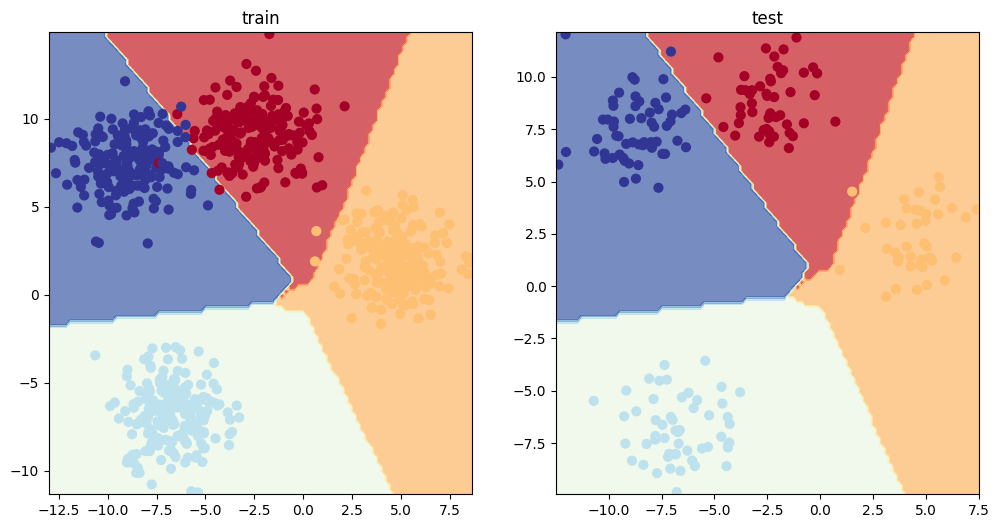

In [125]:
# visualize 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

In [126]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 578.8 kB/s eta 0:00:0000:0100:01
